In [1]:
from qiskit.quantum_info import random_density_matrix, Operator, Statevector, DensityMatrix, random_unitary, random_statevector, random_clifford, Pauli, SparsePauliOp
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit
from qiskit.circuit.library import RXGate, RYGate, RZGate
from qiskit.visualization import *

import numpy as np
import pandas as pd
import scipy as sp
from math import pi, cos, sin
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from itertools import product

In [19]:
def hwp(theta):
    return Operator([[-cos(2 * theta), -sin(2 * theta)],
                      [-sin(2 * theta), cos(2 * theta)]])

In [20]:
def qwp(theta):
    return Operator([[1 - (1 + 1j) * (cos(theta)) ** 2, -(1 + 1j) * sin(theta) * cos(theta)],
                     [-(1 + 1j) * sin(theta) * cos(theta), 1 - (1 + 1j) * (sin(theta)) ** 2]])

In [21]:
psi_in = random_statevector(2, seed=7)
psi_0 = Statevector.from_label("+")
psi_1 = Statevector.from_label("r")
T = random_unitary(2, seed=7)

print(psi_in)
print(psi_0)
print(psi_1)
print(T)

Statevector([0.1448382 -0.88964834j, 0.06718984+0.42782385j],
            dims=(2,))
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))
Operator([[ 0.00230229-0.85093649j,  0.48398855+0.20410015j],
          [-0.51306112+0.11256141j, -0.15267847+0.83713051j]],
         input_dims=(2,), output_dims=(2,))


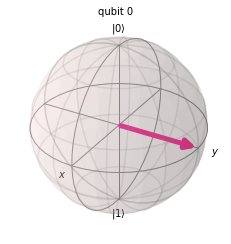

In [22]:
plot_bloch_multivector(psi_1)

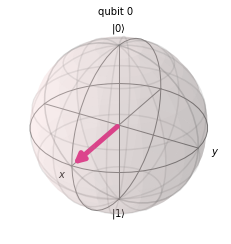

In [31]:
plot_bloch_multivector(psi_1.evolve(hwp(1.9 * pi)))